**By:** *Ahmed Sharaf*

Probability Concepts, Indepdenece and Random Variables

In this Task you will use python to study the following topics:

- How to simulate random experiment outcomes using numpy arrays.
- How to estimate the probability of an event using the relative frequency approach.
- Simulate independent events.
- Calculate arthemitic mean, sample variance, and sample standard deviation for a dataset.
- Calculate covariance and correlation coeffecient of two random variables.


# First: you should run this cell

In [3]:
# Make all numpy available via shorter 'np' prefix
import numpy as np

# matplotlib library
import matplotlib.pyplot as plt

import pandas as pd

# Problem 1

Use numpy to simulate the vector outcomes for repeating the following random experiments $1000$ times and use the relative frequency to compute the probability of the corresponding events:
    
1. **Experiment:** Flipping a fair coin, **Event:** A head occurs.
     
Observe how changing the number of repetition affects the computed probabilities.

**Hints:** 
- Use [numpy.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) or [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) to simulate the experiment.
- Other useful functions [numpy.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html), [numpy.cumsum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html), [numpy.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html), and [matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

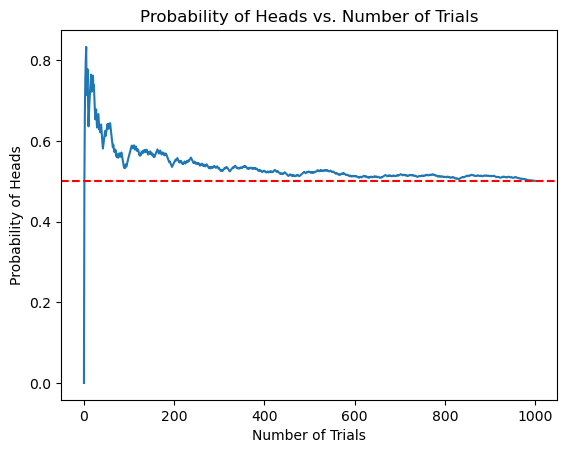

In [6]:
#type your code here:
n_trials = 1000
coin_tosses = np.random.choice([0, 1], size=n_trials, p=[0.5, 0.5])

# Calculate the probability of getting heads
prob_heads = np.cumsum(coin_tosses) / np.arange(1, n_trials + 1)

# Plot the results
plt.plot(prob_heads)
plt.axhline(0.5, color='red', linestyle='--')
plt.xlabel('Number of Trials')
plt.ylabel('Probability of Heads')
plt.title('Probability of Heads vs. Number of Trials')
plt.show()

2. **Experiment:** Rolling a fair die, **Event:** Number 5 occurs.

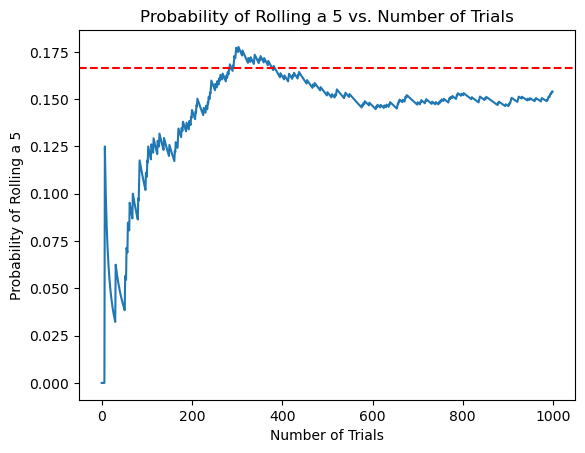

In [8]:
#type your code here:
dice_rolls = np.random.randint(1, 7, size=n_trials)

# Calculate the probability of getting a 5
prob_five = np.cumsum(dice_rolls == 5) / np.arange(1, n_trials + 1)

# Plot the results
plt.plot(prob_five)
plt.axhline(1/6, color='red', linestyle='--')
plt.xlabel('Number of Trials')
plt.ylabel('Probability of Rolling a 5')
plt.title('Probability of Rolling a 5 vs. Number of Trials')
plt.show()

3. **Experiment:** Rolling a fair die, **Event:** A number greater than 3 occurs.

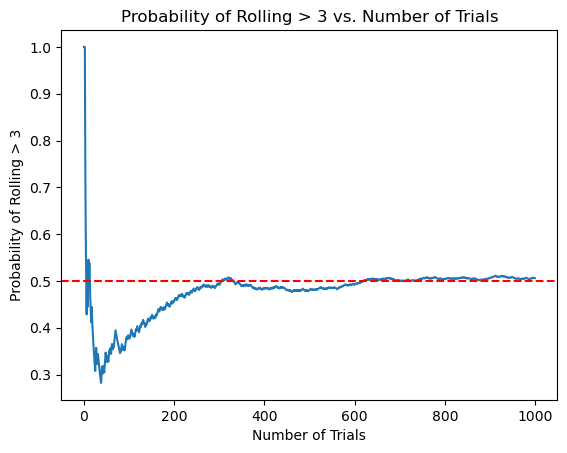

In [10]:
#type your code here:
prob_greater_than_three = np.cumsum(dice_rolls > 3) / np.arange(1, n_trials + 1)

# Plot the results
plt.plot(prob_greater_than_three)
plt.axhline(0.5, color='red', linestyle='--')
plt.xlabel('Number of Trials')
plt.ylabel('Probability of Rolling > 3')
plt.title('Probability of Rolling > 3 vs. Number of Trials')
plt.show()

4. **Experiment:** Rolling two fair dice, **Event:** Sum of two dice equal 5.

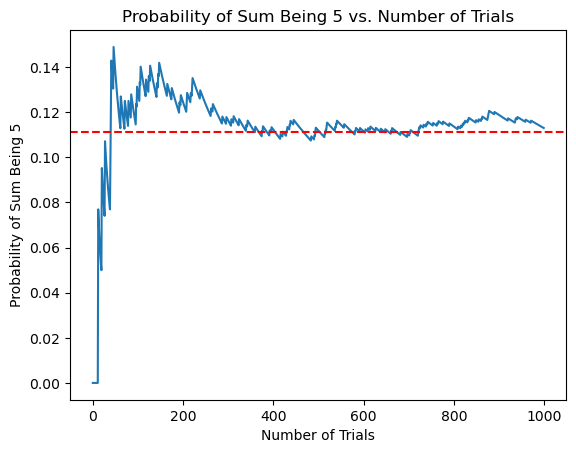

In [12]:
#type your code here:
dice_rolls_1 = np.random.randint(1, 7, size=n_trials)
dice_rolls_2 = np.random.randint(1, 7, size=n_trials)
sum_dice = dice_rolls_1 + dice_rolls_2

# Calculate the probability of the sum being 5
prob_sum_five = np.cumsum(sum_dice == 5) / np.arange(1, n_trials + 1)

# Plot the results
plt.plot(prob_sum_five)
plt.axhline(4/36, color='red', linestyle='--')
plt.xlabel('Number of Trials')
plt.ylabel('Probability of Sum Being 5')
plt.title('Probability of Sum Being 5 vs. Number of Trials')
plt.show()

# Problem 2

Simulate the experiment of tossing $1000$ times a coin with probability of **head (coded as $1$) equal to $0.4$** and probability of **tail (coded as $0$) equal to $0.6$**. How can you check if the simulation of the experiment of been running as expected.

**Hint**: Use [matplotlib.pyplot.hist¶
](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

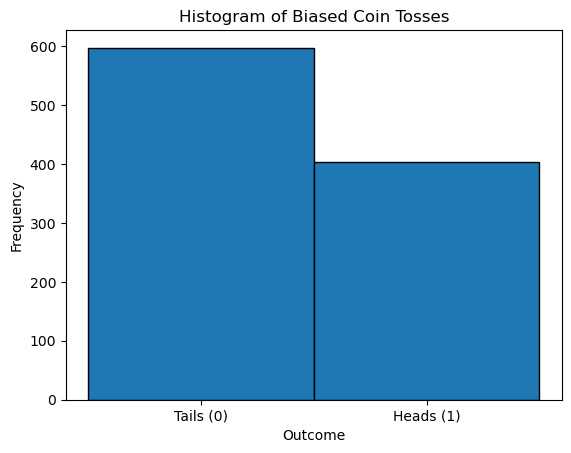

In [14]:
#type your code here:
biased_coin_tosses = np.random.choice([0, 1], size=n_trials, p=[0.6, 0.4])

# Plot the histogram of the results
plt.hist(biased_coin_tosses, bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xticks([0, 1], ['Tails (0)', 'Heads (1)'])
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of Biased Coin Tosses')
plt.show()

# Problem 3: Independence

Use NumPy to create simulations and compute **empirical  probability** for the following outcomes. Compare the results with the **theoretical probability**.

1. Two fair coin flips produce exactly two heads

In [16]:
# Simulate 1 million tests of two fair coin flips
num_trials = 1000000
flips = np.random.randint(2, size=(num_trials, 2))

# Sum of all tests (count number of heads in each trial)
sum_flips = np.sum(flips, axis=1)

# Proportion of tests that produced exactly two heads
prob_two_heads = np.mean(sum_flips == 2)
print(f"Empirical probability of exactly two heads: {prob_two_heads:.6f}")

Empirical probability of exactly two heads: 0.250263


2. Three fair coin flips produce exactly one head

In [22]:
# Simulate 1 million tests of three fair coin flips
flips = np.random.randint(2, size=(num_trials, 3))

# Sum of all tests (count number of heads in each trial)
sum_flips = np.sum(flips, axis=1)

# Proportion of tests that produced exactly one head
prob_one_head = np.mean(sum_flips == 1)
print(f"Empirical probability of exactly one head: {prob_one_head:.6f}")

Empirical probability of exactly one head: 0.375469


3. Three biased coin flips with P(H) = 0.6 produce exactly one head

In [24]:
# Simulate 1 million tests of three biased coin flips with P(H) = 0.6
flips = np.random.choice([0, 1], size=(num_trials, 3), p=[0.4, 0.6])

# Sum of all tests (count number of heads in each trial)
sum_flips = np.sum(flips, axis=1)

# Proportion of tests that produced exactly one head
prob_one_head_biased = np.mean(sum_flips == 1)
print(f"Empirical probability of exactly one head (biased): {prob_one_head_biased:.6f}")

Empirical probability of exactly one head (biased): 0.288343


# Problem 4:Random Variables Statistical Tools
Simulate Rolling a fair die $1000$ times. Then calculate the following:

- Sample mean
- Sample variance
- Sample standard deviation

Compare the results with the theoretical probability.

In [30]:
#type your code here:
# Simulate rolling a fair die 1000 times
rolls = np.random.randint(1, 7, size=1000)

# Calculate sample mean, sample variance, and sample standard deviation
sample_mean = np.mean(rolls)
sample_variance = np.var(rolls, ddof=1)  # ddof=1 for sample variance
sample_std_dev = np.std(rolls, ddof=1)

print(f"Sample mean: {sample_mean:.3f}")
print(f"Sample variance: {sample_variance:.6f}")
print(f"Sample standard deviation: {sample_std_dev:.6f}")

Sample mean: 3.593
Sample variance: 2.836187
Sample standard deviation: 1.684098


# Problem 5: Correlation and Covariance

The CSV file includes a hourly/daily summary for Szeged, Hungary area, between 2006 and 2016. After inspecting the data:

- Calculate the covariance and correlation coeffecient between temperature and apparent temperature
- Calculate the covariance and correlation coeffecient between temperature and humidity

In [46]:
df = pd.read_csv('weatherHistory.csv')
temperature = df['Temperature (C)'].to_numpy().reshape(-1, 1)
apparent_temp = df['Apparent Temperature (C)'].to_numpy().reshape(-1, 1)
humidity = df['Humidity'].to_numpy().reshape(-1, 1)

Text(0, 0.5, 'Apparent Temperature (C)')

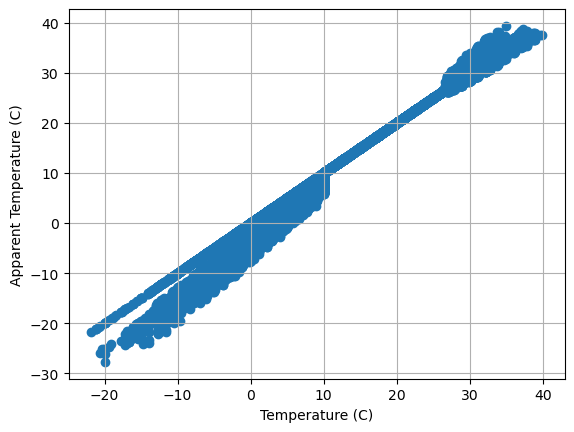

In [48]:
plt.scatter(temperature, apparant_temp)
plt.grid()
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')

Text(0, 0.5, 'Temperature (C)')

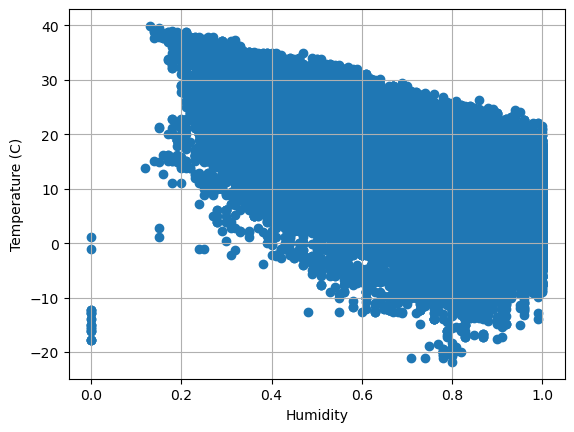

In [49]:
plt.scatter(humidity, temperature)
plt.grid()
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')

## Temperature and Apparent Temperature

In [53]:
#type your code here:

# Calculate covariance and correlation coefficient
cov_temp_apparent = np.cov(temperature.T, apparent_temp.T)[0, 1]
corr_temp_apparent = np.corrcoef(temperature.T, apparent_temp.T)[0, 1]

print(f"Covariance: {cov_temp_apparent}")
print("---------------------------------------------------")
print("np.cov(): \n", np.cov(temperature.T, apparent_temp.T))
print("---------------------------------------------------")
print(f"Correlation Coefficient: {corr_temp_apparent}")
print("---------------------------------------------------")
print("np.corrcoef(): \n", np.corrcoef(temperature.T, apparent_temp.T))

Covariance: 101.418283188541
---------------------------------------------------
np.cov(): 
 [[ 91.23203712 101.41828319]
 [101.41828319 114.42254413]]
---------------------------------------------------
Correlation Coefficient: 0.9926285641920806
---------------------------------------------------
np.corrcoef(): 
 [[1.         0.99262856]
 [0.99262856 1.        ]]


## Temperature and Humidity

In [56]:
#type your code here:
# Calculate covariance and correlation coefficient
cov_temp_humidity = np.cov(temperature.T, humidity.T)[0, 1]
corr_temp_humidity = np.corrcoef(temperature.T, humidity.T)[0, 1]

print(f"Covariance: {cov_temp_humidity}")
print("---------------------------------------------------")
print("np.cov(): \n", np.cov(temperature.T, humidity.T))
print("---------------------------------------------------")
print(f"Correlation Coefficient: {corr_temp_humidity}")
print("---------------------------------------------------")
print("np.corrcoef(): \n", np.corrcoef(temperature.T, humidity.T))

Covariance: -1.180461789785137
---------------------------------------------------
np.cov(): 
 [[ 9.12320371e+01 -1.18046179e+00]
 [-1.18046179e+00  3.82095917e-02]]
---------------------------------------------------
Correlation Coefficient: -0.6322546750264326
---------------------------------------------------
np.corrcoef(): 
 [[ 1.         -0.63225468]
 [-0.63225468  1.        ]]


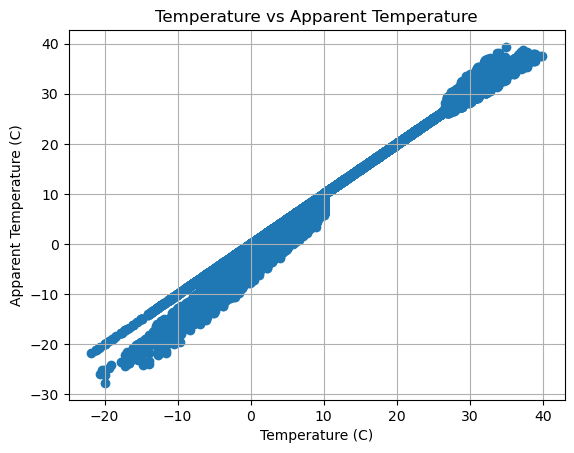

In [58]:
import matplotlib.pyplot as plt

plt.scatter(temperature, apparent_temp)
plt.grid()
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.title('Temperature vs Apparent Temperature')
plt.show()

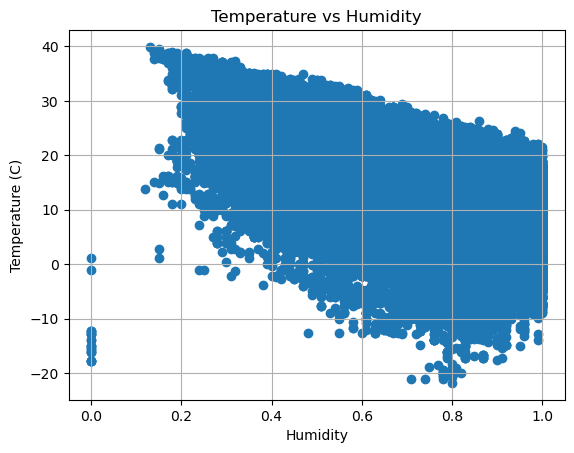

In [60]:
plt.scatter(humidity, temperature)
plt.grid()
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.title('Temperature vs Humidity')
plt.show()